In [234]:
import numpy as np
from matplotlib import pyplot as plt

Erzeugt eine Punktwolke mit Verzerrung `y_factor`, Drehung `angle` und Translation `shift`.

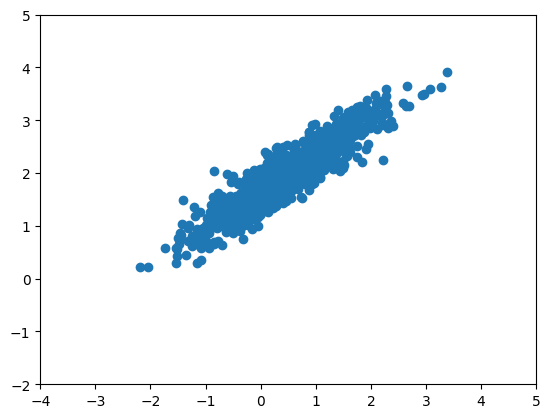

In [235]:
y_factor = 0.2
angle = np.pi * 0.2
rotation_mat = np.array([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]])
shift = [0.5, 2]

points = np.random.randn(1000, 2) * np.sqrt(1)
points[:,1] *= y_factor
points = points @ rotation_mat
points += shift
plt.xlim(-4, 5)
plt.ylim(-2, 5)
plt.scatter(points[:,0], points[:,1]);

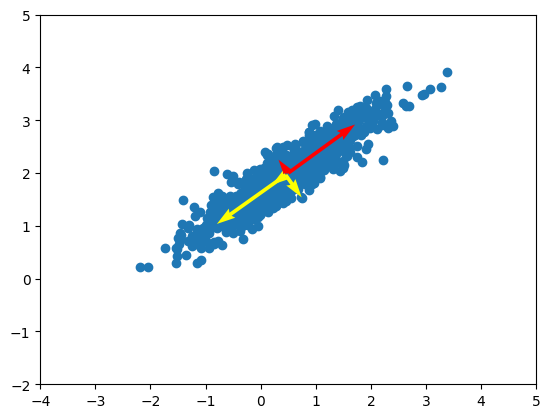

The ratio of the principal directions is: 0.04001721565873991


In [236]:
# Analytische Lösung
plt.xlim(-4, 5)
plt.ylim(-2, 5)
plt.scatter(points[:,0], points[:,1])
exact_origins = np.array([[shift[0], shift[0]], [shift[1], shift[1]]])
exact_basis = np.array([[1, 0], [0, 1]]) @ rotation_mat
exact_basis[[1,0]] = exact_basis[[0,1]] # Vertauscht fuer matplotlib
plt.quiver(exact_origins[0,:], exact_origins[1,:], exact_basis[:,0], exact_basis[:,1], scale=np.array([30, 30 * y_factor]), color="red")

# TODO:
# - Berechne die zwei Hauptrichtungen aus der Punktwolke und plotte sie über der analytischen Lösung
# - Berechne das Verhältnis der Hauptrichtungen und vergleiche es mit y_factor


mean = np.mean(points, axis=0)

centered_points = points - mean

cov_matrix = np.cov(centered_points, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
scaled_eigenvectors = eigenvectors * np.sqrt(eigenvalues)

plt.quiver([mean[0]], [mean[1]],[scaled_eigenvectors[0, 1]], [scaled_eigenvectors[1, 1]], scale=np.array([30, 30 * y_factor]), color="yellow")
plt.quiver([mean[0]], [mean[1]], [scaled_eigenvectors[0, 0]], [scaled_eigenvectors[1, 0]], color="yellow")
plt.xlim(-4, 5)
plt.ylim(-2, 5)
plt.show()

ratio = np.abs(eigenvalues[0] / eigenvalues[1])
print("The ratio of the principal directions is:", ratio)


